In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

   search_id  feature_0  feature_1  feature_2  feature_3  feature_4  \
0        758          9          0          0          1         20   
1        758          9          0          0          1         20   
2        758          9          0          0          1         20   
3        758          9          0          0          1         20   
4        758          9          0          0          1         20   

   feature_5  feature_6  feature_7  feature_8  ...  feature_70  feature_71  \
0          3         40          0          3  ...    0.204682    0.271755   
1          3         40          0          3  ...    0.195531    0.188787   
2          3         40          0          3  ...    0.148609    0.186517   
3          3         40          0          3  ...    0.223748    0.229039   
4          3         40          0          3  ...    0.170935    0.249031   

   feature_72  feature_73  feature_74  feature_75  feature_76  feature_77  \
0    0.055623           0  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


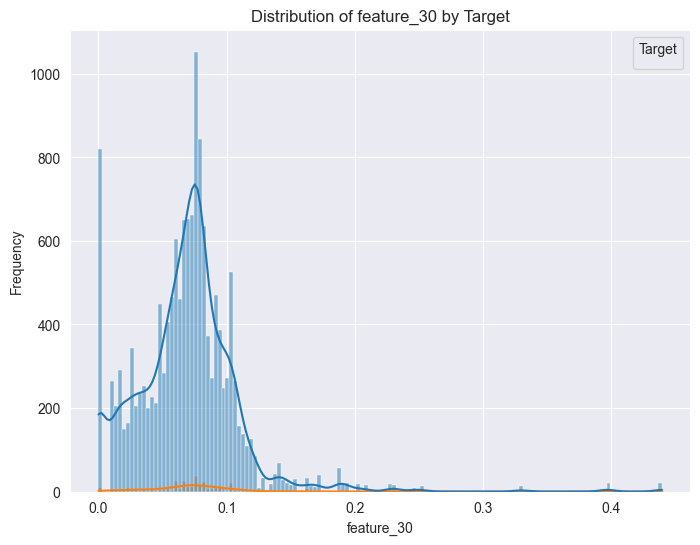

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


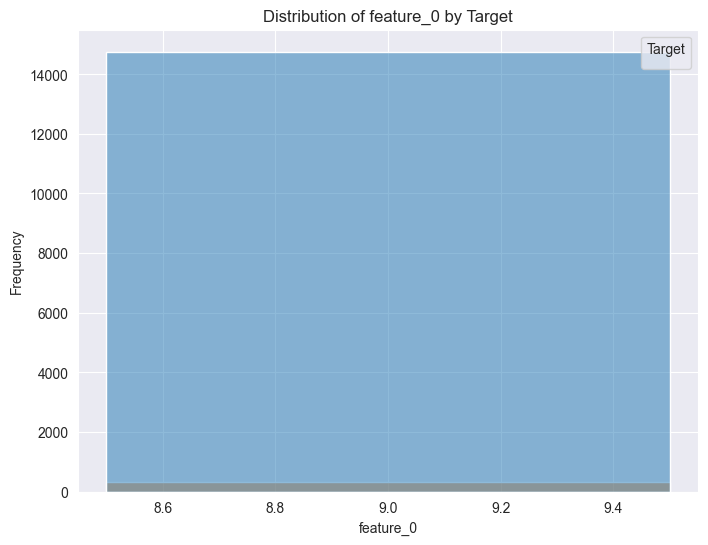

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


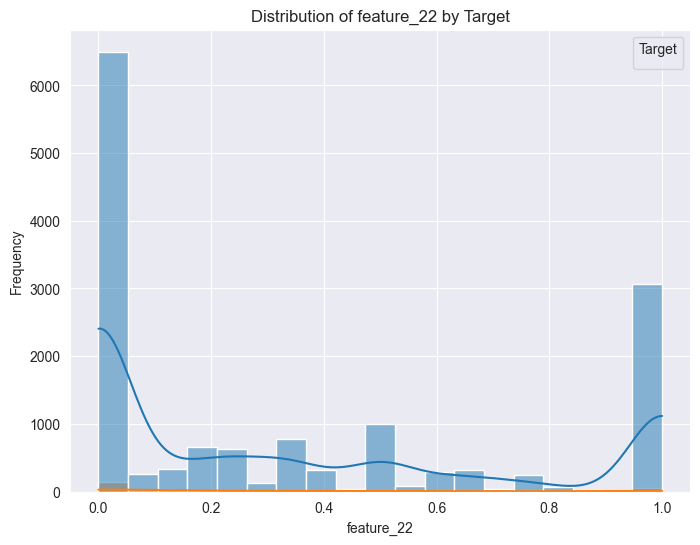

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


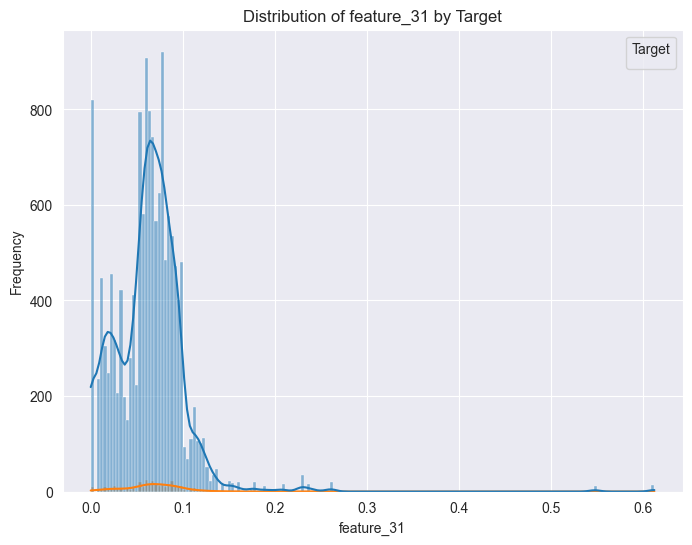

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


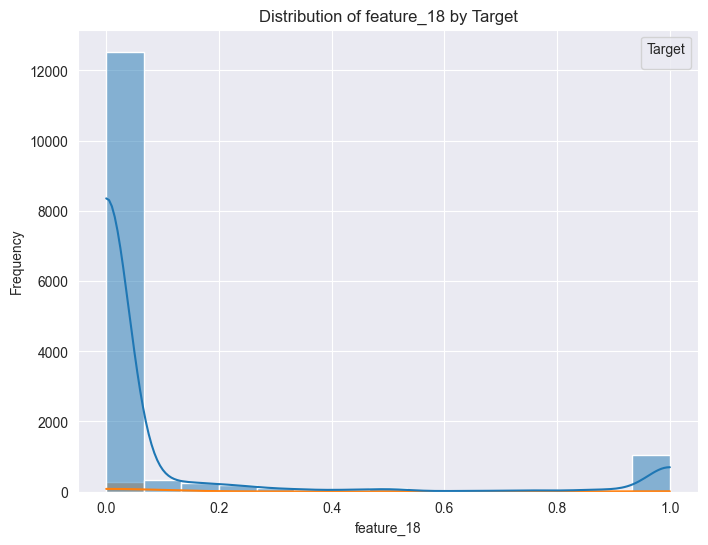

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


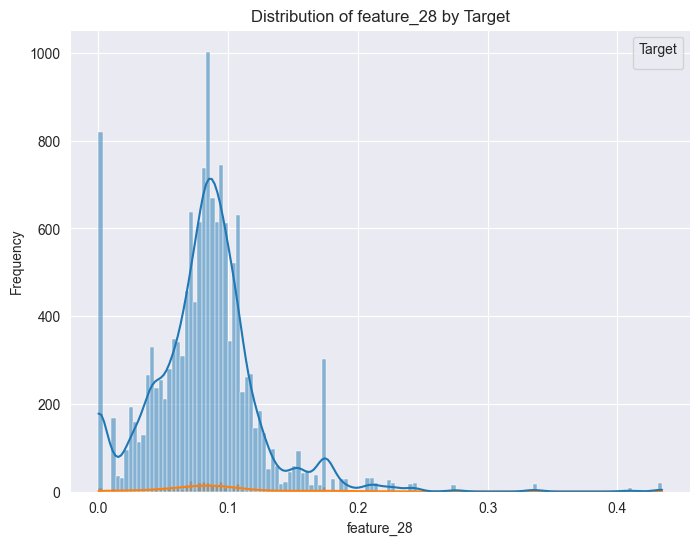

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


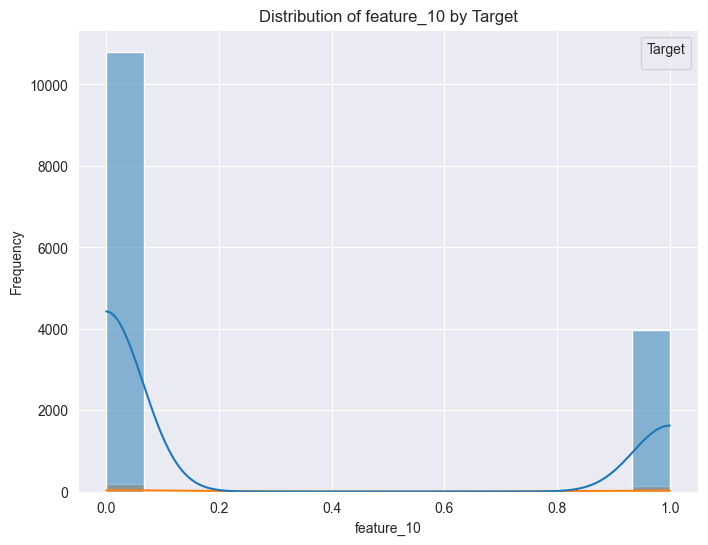

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


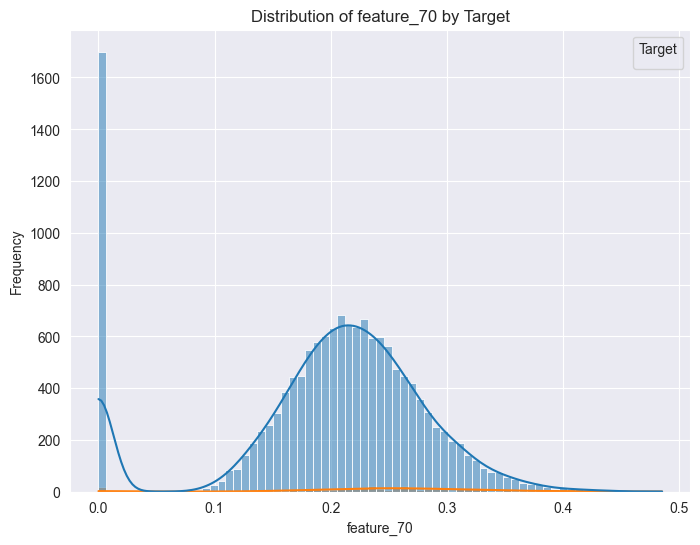

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


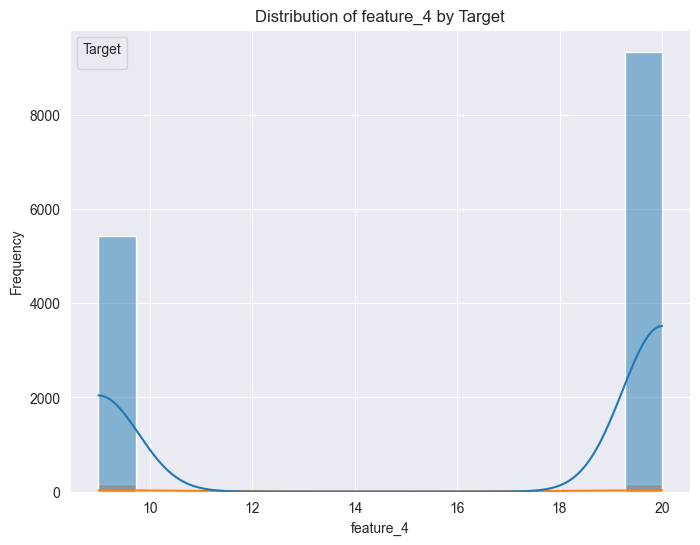

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


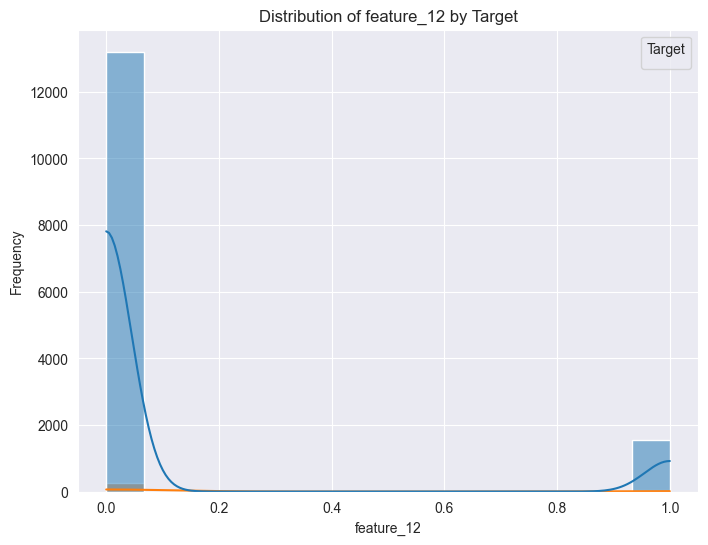

In [10]:
train_data = pd.read_csv("train_df.csv")
test_data = pd.read_csv("test_df.csv")

print(train_data.head())

numeric_features = train_data.drop(['search_id', 'target'], axis=1)
selected_numeric_features = numeric_features.sample(n=10, axis=1, random_state=42)

for feature in selected_numeric_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data, x=feature, hue='target', kde=True)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Target')
    plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import ndcg_score

X_train = train_data.drop(['search_id', 'target', 'feature_0'], axis=1)
y_train = train_data['target']

X_test = test_data.drop(['search_id', 'target', 'feature_0'], axis=1)
y_test = test_data['target']

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

y_test_inverted = 1 - y_test

ndcg_score = ndcg_score(np.array([y_test_inverted]), np.array([y_pred_proba]))
print("NDCG на тестовом наборе данных:", ndcg_score)

NDCG на тестовом наборе данных: 0.9966123427677904
